In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

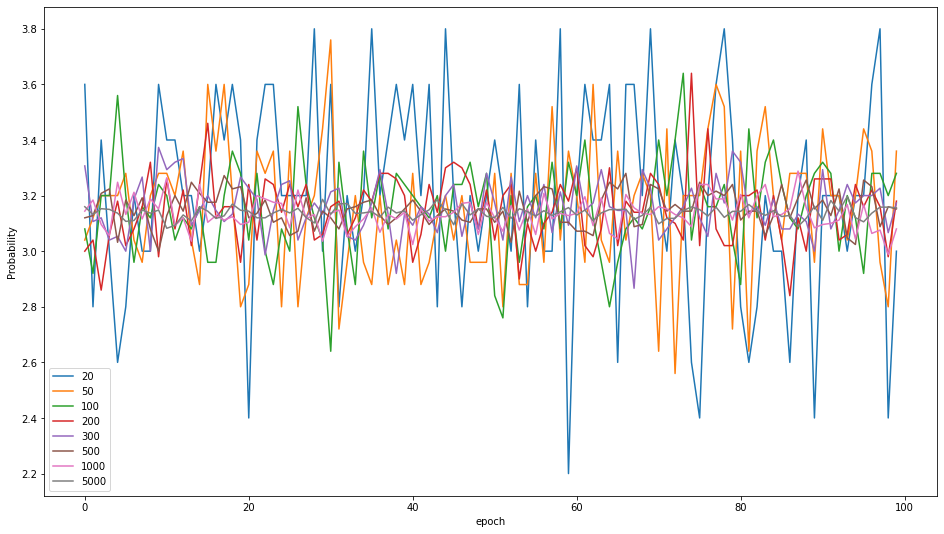

   sample_count      mean       std
0            20  3.206000  0.130764
1            50  3.150400  0.057444
2           100  3.156800  0.027862
3           200  3.148200  0.015841
4           300  3.157467  0.009087
5           500  3.152320  0.003787
6          1000  3.134800  0.003182
7          5000  3.138136  0.000472


In [13]:
# ex1

def calculate_pi(n: int):
    circle_count = 0
    
    for i in range(n):
        x = random.random()
        y = random.random()
        len_r = np.sqrt(np.power(x, 2) + np.power(y, 2))
        if len_r <= 1:
            circle_count += 1
            
    pi = circle_count * 4 / n
    return pi

def ex1():
    samples_list = [20, 50, 100, 200, 300, 500, 1000, 5000]
    categories = [str(x) for x in samples_list]
    epochs = 100
    result_dict = {}
    plt.figure(figsize=(16, 9))
    for index, n in enumerate(samples_list):
        result_list = []
        for c in range(epochs):
            result_list.append(calculate_pi(n))
        result_dict[categories[index]] = result_list
        plt.plot(range(epochs), result_list)
    
    plt.legend(categories)
    plt.ylabel('Probability')
    plt.xlabel('epoch')
    plt.show()
    
    mean_list = [np.mean(v) for k, v in result_dict.items()]
    std_list = [np.var(v) for k, v in result_dict.items()]
    table = pd.DataFrame({'sample_count': samples_list, 'mean': mean_list, 'var': std_list})
    print(table)
    
ex1()

In [9]:
# ex2

def canMoveTo(x: int, y: int, grid: np.array):
    result = True
    mid = (grid.shape[0] // 2, grid.shape[0] // 2)
    if (x, y) == mid:
        if grid[(x, y)] >= 2:
            result = False
    else:
        if grid[(x, y)] >= 1:
            result = False
    return result


def moveInGridSize(size: int):
    assert size > 0
    mid = (size // 2, size // 2)
    
    grid = np.zeros((size, size), dtype=np.int32)
    current = (0, 0)
    grid[current] = 1
    path = [current]
    
    fail_count = 0
    
    while True:
        p = random.random()
        
        x = current[0]
        y = current[1]
        if current == (0, 0):
            if not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y + 1, grid):
                # 绝路
                grid = np.zeros((size, size), dtype=np.int32)
                current = (0, 0)
                grid[current] = 1
                path = [current]
                fail_count += 1
                continue
            else:
                if p < 0.5:
                    x += 1 # 纵走
                else: 
                    y += 1 # 横走

            
        elif current == (0, size - 1):
            if not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y - 1, grid):
                # 绝路
                grid = np.zeros((size, size), dtype=np.int32)
                current = (0, 0)
                grid[current] = 1
                path = [current]
                fail_count += 1
                continue
            else:                
                if p < 0.5: 
                    x += 1
                else:
                    y -= 1
        elif current == (size - 1, 0):
            if not canMoveTo(x - 1, y, grid) and not canMoveTo(x, y + 1, grid):
                # 绝路
                grid = np.zeros((size, size), dtype=np.int32)
                current = (0, 0)
                grid[current] = 1
                path = [current]
                fail_count += 1
                continue
            else:
                if p < 0.5:
                    x -= 1
                else:
                    y += 1
        elif current == (size - 1, size - 1):
                # 到达，结束！
#                 print('Finish!')
                break
        else:
            if x == 0:
                if not canMoveTo(x, y - 1, grid) and not canMoveTo(x, y + 1, grid) and not canMoveTo(x + 1, y, grid):
                    # 绝路
                    grid = np.zeros((size, size), dtype=np.int32)
                    current = (0, 0)
                    grid[current] = 1
                    path = [current]
                    fail_count += 1
                    continue
                else:
                    if p < 0.3333:
                        y -=1
                    elif 0.3333 <= p < 0.6667:
                        y += 1
                    else:
                        x += 1
            elif x == size - 1:
                if not canMoveTo(x, y - 1, grid) and not canMoveTo(x, y + 1, grid) and not canMoveTo(x - 1, y, grid):
                    # 绝路
                    grid = np.zeros((size, size), dtype=np.int32)
                    current = (0, 0)
                    grid[current] = 1
                    path = [current]
                    fail_count += 1
                    continue
                else:
                    if p < 0.3333:
                        y -=1
                    elif 0.3333 <= p < 0.6667:
                        y += 1
                    else:
                        x -= 1
            elif y == 0:
                if not canMoveTo(x - 1, y, grid) and not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y + 1, grid):
                    # 绝路
                    grid = np.zeros((size, size), dtype=np.int32)
                    current = (0, 0)
                    grid[current] = 1
                    path = [current]
                    fail_count += 1
                    continue
                else:
                    if p < 0.3333:
                        x -=1
                    elif 0.3333 <= p < 0.6667:
                        x += 1
                    else:
                        y += 1
            elif y == size - 1:
                if not canMoveTo(x - 1, y, grid) and not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y - 1, grid):
                    # 绝路
                    grid = np.zeros((size, size), dtype=np.int32)
                    current = (0, 0)
                    grid[current] = 1
                    path = [current]
                    fail_count += 1
                    continue
                else:
                    if p < 0.3333:
                        x -=1
                    elif 0.3333 <= p < 0.6667:
                        x += 1
                    else:
                        y -= 1
            else:
                if not canMoveTo(x - 1, y, grid) and not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y - 1, grid) and not canMoveTo(x, y + 1, grid):
                    # 绝路
                    grid = np.zeros((size, size), dtype=np.int32)
                    current = (0, 0)
                    grid[current] = 1
                    path = [current]
                    fail_count += 1
                    continue
                else:
                    if p < 0.25:
                        x -= 1
                    elif 0.25 <= p < 0.5:
                        x += 1
                    elif 0.5 <= p < 0.75:
                        y -= 1
                    else:
                        y += 1
        
        if canMoveTo(x, y, grid):            
            path.append((x, y))
            current = (x, y)
            grid[current] += 1
    
#     print('grid: \n', grid)
#     print('path: ', path)
#     print('try count: ', fail_count)
    return fail_count

def ex2():
    p_list = []
    for i in range(20000):
        count = moveInGridSize(7) + 1 # 最后成功达到的尝试次数
        p_list.append(1.0 / count)
    
#     plt.figure(figsize=(16, 9))
#     plt.plot(range(len(p_list)), p_list)
#     plt.show()
#     print(p_list)
    print('mean: ', np.mean(p_list))
    print('var: ', np.var(p_list))
    
ex2()

mean:  0.46964748512431825
var:  0.11340453784170652


In [38]:
# ex3

def isASucceed():
    result = False
    p = random.random()
    if p <= 0.85:
        result = True
    return result

def isBCSucceed():
    result = False
    p1 = random.random()
    if p1 <= 0.95:
        p2 = random.random()
        if p2 <= 0.9:
            result = True
    return result


def ex3():
    total_count = 60000
    fail_count = 0
    for i in range(total_count):
        if not isASucceed() and not isBCSucceed():
            fail_count += 1
    
    print(1 - fail_count / total_count)
    
ex3()

0.9783333333333333
